# Radiation checker 

Ionizing radiation is invisible and not directly detectable by human senses, so radiation detection instruments such as Geiger counters are required to detect it. Ionizing radiation is used in a wide variety of fields such as medicine, research, manufacturing, construction, and many other areas, but presents a health hazard if proper measures against undesired exposure aren't followed. Exposure to ionizing radiation causes damage to living tissue, and can result in mutation, radiation sickness, cancer, and death. 
~ Wikipedia

There are fiew pages which provide online measurements abour gamma radiation:
- http://radioactiveathome.org/map/ -  project conducted by community, anyone can have his one Geiger counter and send data to server
- http://www.srp.ecocentre.kiev.ua/MEDO-PS/index.php - map with Geiger counters located inside Chernobyl Exclusion Zone
- http://www.tepco.co.jp/en/nu/fukushima-np/f1/index-e.html - Geiger counters located nearby Fukushima Daiichi Nuclear Power Station

In this project I use data from first link. Unfortunately archive data are stored maximum 2 months. Majjority of sensors are located in Europe, thus this project is focused on Europe.
There are two modules:
- NLPNewsChecker - which extract date and countries(European) from news, and it also checks if news is about ionizing radiation
- RadiationCheckingTool - tool which download data from http://radioactiveathome.org/map/ and its archive. Then data are being processed and analised.

## NLPNewsChecker example

In [1]:
news1 = "http://www.bbc.com/news/av/world-europe-17853134/ukraine-to-build-chernobyl-cap-to-stop-radiation-leak"
news2 = "http://www.mirror.co.uk/science/nuclear-radiation-been-spreading-across-9861177"
news3 = "http://www.livemint.com/Politics/JCr7gRUyV7l8xtkWwhwHfN/High-air-pollution-levels-may-hit-Indias-solar-power-genera.html"

In [2]:
from ionizing_radiation_news_validator import NLPNewsChecker
nlp_news1 = NLPNewsChecker(news1)
nlp_news2 = NLPNewsChecker(news2)
nlp_news3 = NLPNewsChecker(news3)

In [3]:
nlp_news1.get_article_date()
nlp_news2.get_article_date()
nlp_news3.get_article_date()

Article date: 2012-04-26
Article date: 2017-02-21
Article date: 2017-06-03


In [4]:
nlp_news1.find_countries_named_in_article()
nlp_news2.find_countries_named_in_article()
nlp_news3.find_countries_named_in_article()

Enumerated european countries:
Belarus
France
Ireland
Ukraine
Enumerated european countries:
Czech Republic
France
Norway
Finland
Germany
Hungary
Spain
Poland
There are no enumerated country in article.


In [5]:
nlp_news1.is_this_article_about_radiation()
nlp_news2.is_this_article_about_radiation()
nlp_news3.is_this_article_about_radiation()

This article is about nuclear radiation
This article is about nuclear radiation
This article is about solar radiation


## RadiationCheckingTool example

In [7]:
from ionizing_radiation_news_validator import RadiationCheckingTool
rad_tool = RadiationCheckingTool(nlp_news2)

Unfortunetely data are available only to 2 months backward, so I have to change date computed in NLPNewsChecker

In [8]:
from time import gmtime, strftime
rad_tool.set_up_date(strftime("%Y-%m-%d", gmtime()))


Data for Czech Republic:


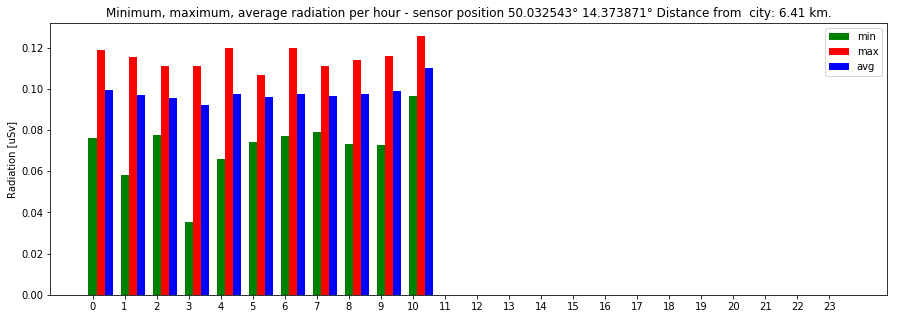

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h

Data for France:


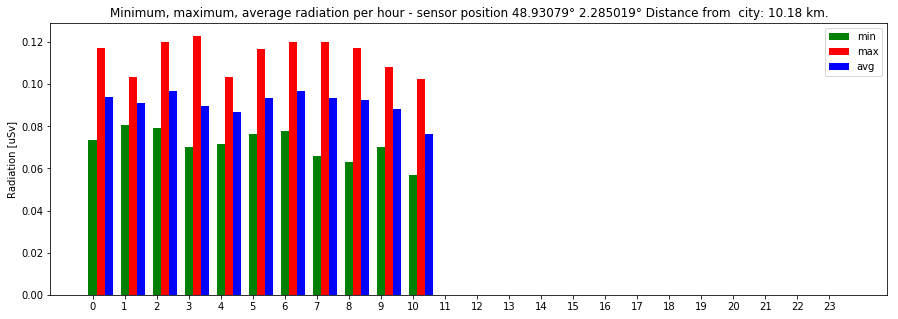

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h

Data for Norway:


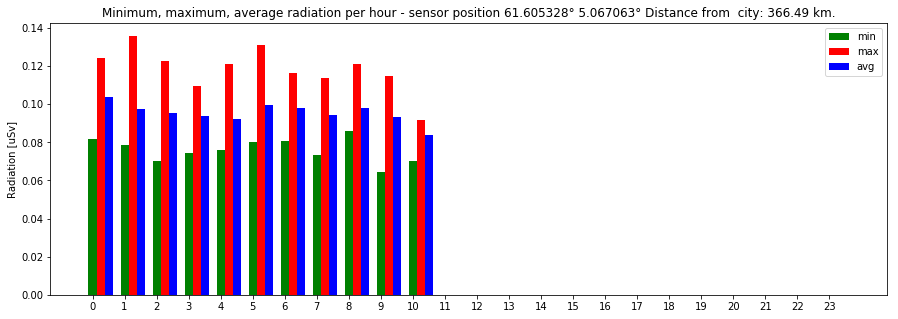

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h

Data for Finland:


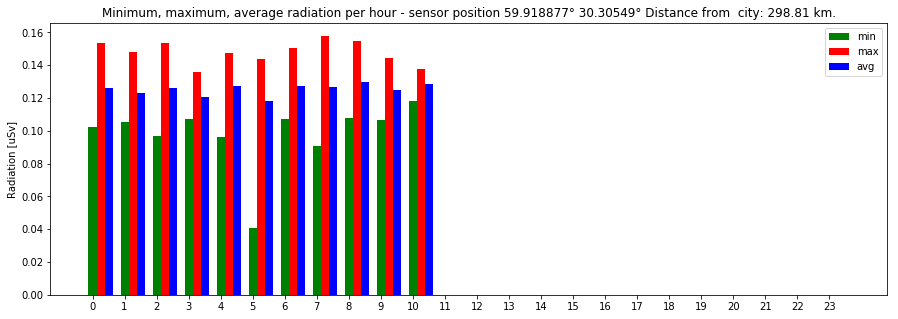

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h

Data for Germany:


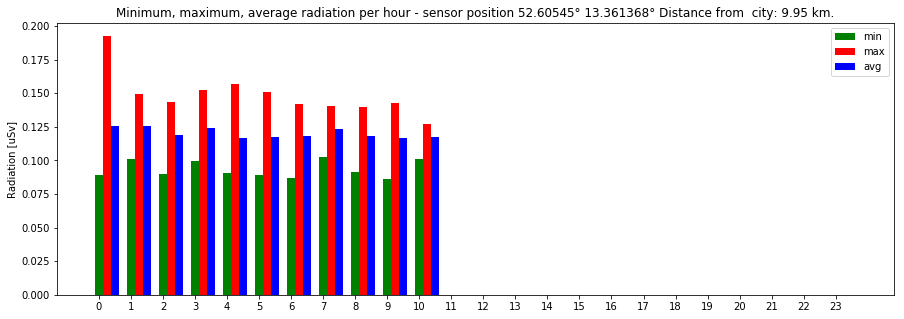

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h

Data for Hungary:


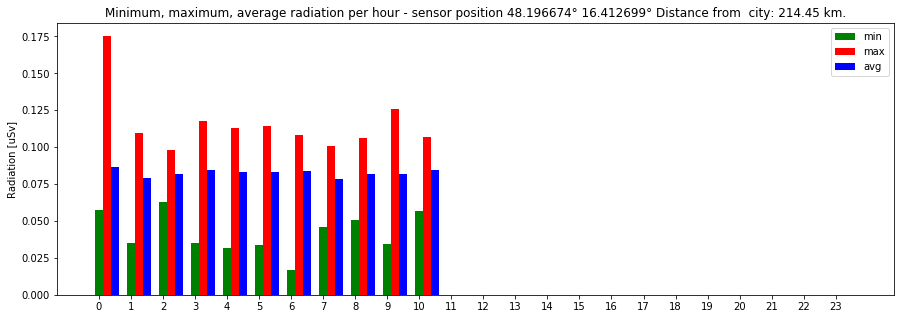

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h

Data for Spain:


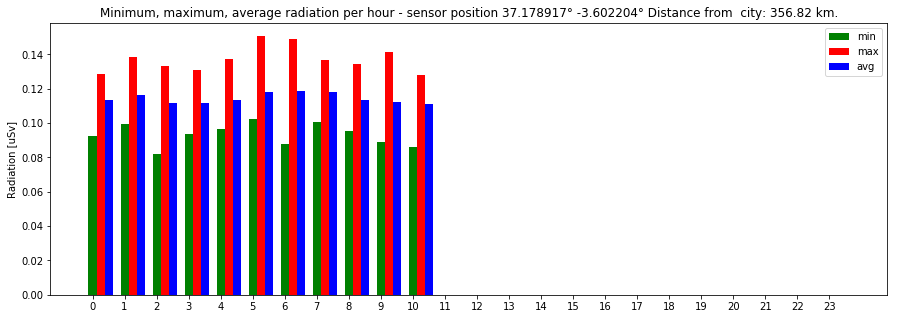

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h

Data for Poland:


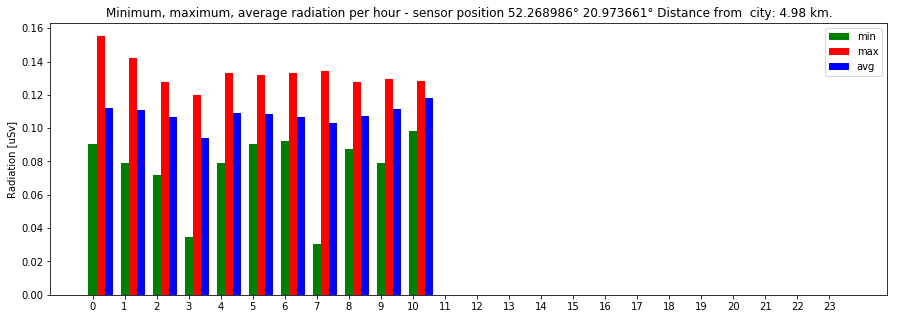

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h


In [9]:
rad_tool.check_radiation_in_countries()

In [9]:
# You can also set up your own list of countries
rad_tool.set_up_list_of_countries(["Italy", "Great Britain", "Russia"])


Data for Italy:


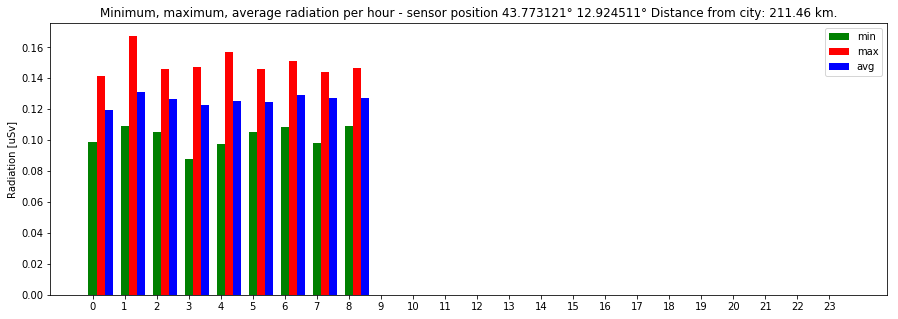

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h

Data for Great Britain:


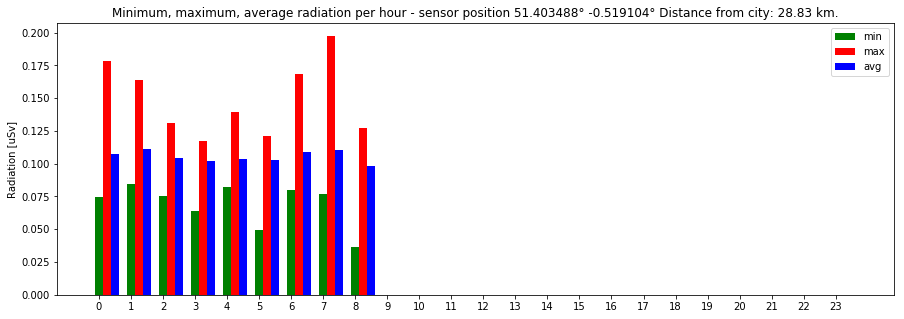

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h

Data for Russia:


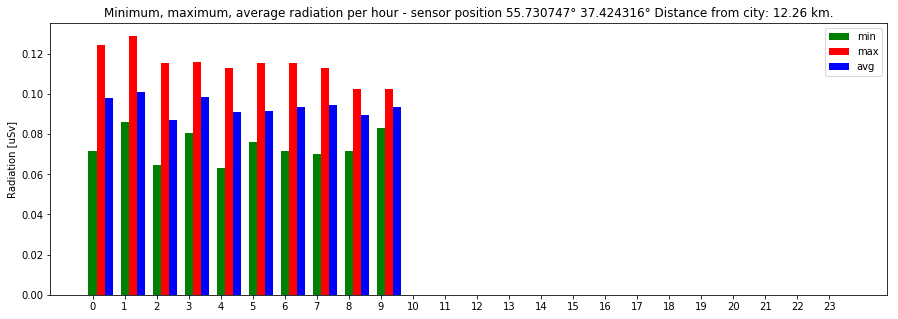

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h


In [10]:
rad_tool.check_radiation_in_countries()

You can even check radiation is one particular city(can be not in Europe, but only big/capial cities). Return data from sensor in range X km. Default 100 km.

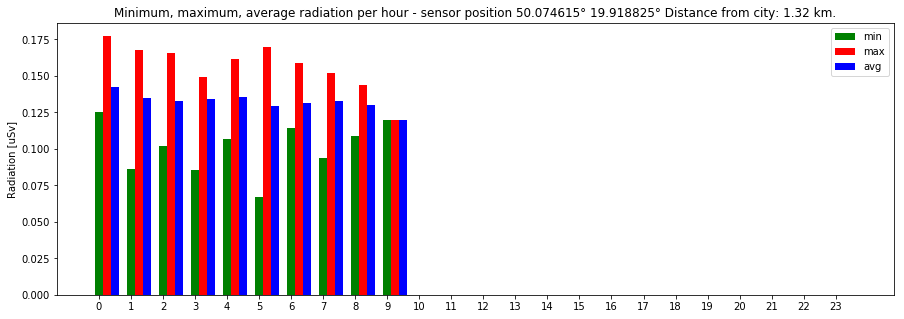

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h


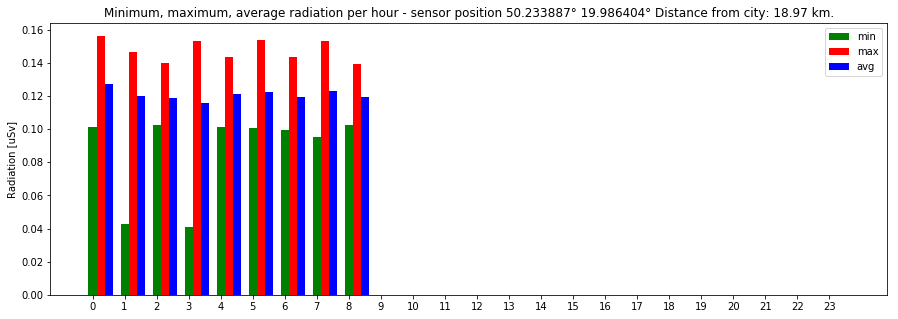

All average measurements are in quota
This sensor has 0.00% measurements above 0.3 uSv/h


In [11]:
rad_tool.check_radiation_in_city_day("Kraków", strftime("%Y-%m-%d", gmtime()), 20)

You can also find nearest nuclear power plants.

In [12]:
rad_tool.print_reactors_in_range("Kraków", 300)
rad_tool.print_reactors_in_range("Berlin", 100)

Reactors in range 300
Dukovany-1 49.089 16.149
Dukovany-2 49.089 16.149
Dukovany-3 49.089 16.149
Dukovany-4 49.088 16.149
Bohunice-3 48.492 17.687
Bohunice-4 48.492 17.687
Mochovce-1 48.261 18.455
Mochovce-2 48.260 18.455
Reactors in range 100
Rheinsberg Nuclear Power Plant 53.147 12.990
